---
# <font color = green> Linear Regression Assignment
---

### Problem Statement
---

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 



In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

They have contacted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

-  Which variables are significant in predicting the demand for shared bikes.
-  How well those variables describe the bike demands <Br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 



#### Business Goal:
---

We are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

---
Importing libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


### <font color = brown> Reading and Understanding the Data
---



Reading dataset

In [2]:
Bike_share_df = pd.read_csv('day.csv')


Inspecting 1st 5 row's

In [3]:
Bike_share_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600


Inspecting last 5 row's

In [4]:
Bike_share_df.tail()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
725      726  27-12-2019       1   1    12        0        5           1   
726      727  28-12-2019       1   1    12        0        6           0   
727      728  29-12-2019       1   1    12        0        0           0   
728      729  30-12-2019       1   1    12        0        1           1   
729      730  31-12-2019       1   1    12        0        2           1   

     weathersit       temp     atemp      hum  windspeed  casual  registered  \
725           2  10.420847  11.33210  65.2917  23.458911     247        1867   
726           2  10.386653  12.75230  59.0000  10.416557     644        2451   
727           2  10.386653  12.12000  75.2917   8.333661     159        1182   
728           1  10.489153  11.58500  48.3333  23.500518     364        1432   
729           2   8.849153  11.17435  57.7500  10.374682     439        2290   

      cnt  
725  2114  
726  3095  
727  1341  
728  1796  
729  2729

Checking shape of dataset

In [5]:
Bike_share_df.shape

(730, 16)

The given dataset has 730 row's and 16 column's

Information about the Dataset

In [6]:
Bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1st.Obsevervation - There is is not any Null present in Dataset

Again crosscheck for null value's in Dataset

In [7]:
Bike_share_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

2nd.Observation - There is is not any Null present in Dataset

Statistical information about the Dataset

In [8]:
Bike_share_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Data Cleaning
For better Visulization we will drop some columns
1. `instant` as it is just index no.
2. `temp` and `atemp` as by looking at data we can see there is strong relation b/w these two 
3. `dteday` as month and year is already given in the dataset
4. `casual` and `registered` as is gives the count, we need total count and Total count is provided dataset so we need don't these columns

Dropping `instant` column

In [9]:
Bike_share_df.drop('instant', axis = 1, inplace = True)

Dropping `atemp` and `temp` column's

In [10]:
#Bike_share_df.drop(['temp','atemp'], axis=1, inplace = True)

Dropping `dteday` column

In [11]:
Bike_share_df.drop('dteday', axis=1, inplace = True)

 Dropping `casual` and  `registered` columns 

In [12]:
Bike_share_df.drop(['casual','registered'], axis=1, inplace = True)

Dataframe after dropping certain column's

In [13]:
Bike_share_df

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        1           1           2  14.110847   
1         1   0     1        0        2           1           2  14.902598   
2         1   0     1        0        3           1           1   8.050924   
3         1   0     1        0        4           1           1   8.200000   
4         1   0     1        0        5           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        5           1           2  10.420847   
726       1   1    12        0        6           0           2  10.386653   
727       1   1    12        0        0           0           2  10.386653   
728       1   1    12        0        1           1           1  10.489153   
729       1   1    12        0        2           1           2   8.849153   

        atemp      hum  windspeed   cnt  
0    18.18125  80.5833  10.749882   985  
1    17.68695  69.6087  16.652113   801  
2     9.47025  43.7273  16.636703  1349  
3    10.60610  59.0435  10.739832  1562  
4    11.46350  43.6957  12.522300  1600  
..        ...      ...        ...   ...  
725  11.33210  65.2917  23.458911  2114  
726  12.75230  59.0000  10.416557  3095  
727  12.12000  75.2917   8.333661  1341  
728  11.58500  48.3333  23.500518  1796  
729  11.17435  57.7500  10.374682  2729  

[730 rows x 12 columns]

##  <font color = green> Visualizing the Data

---
**Visulization 1**<br>
Visualizing Numerical Variables


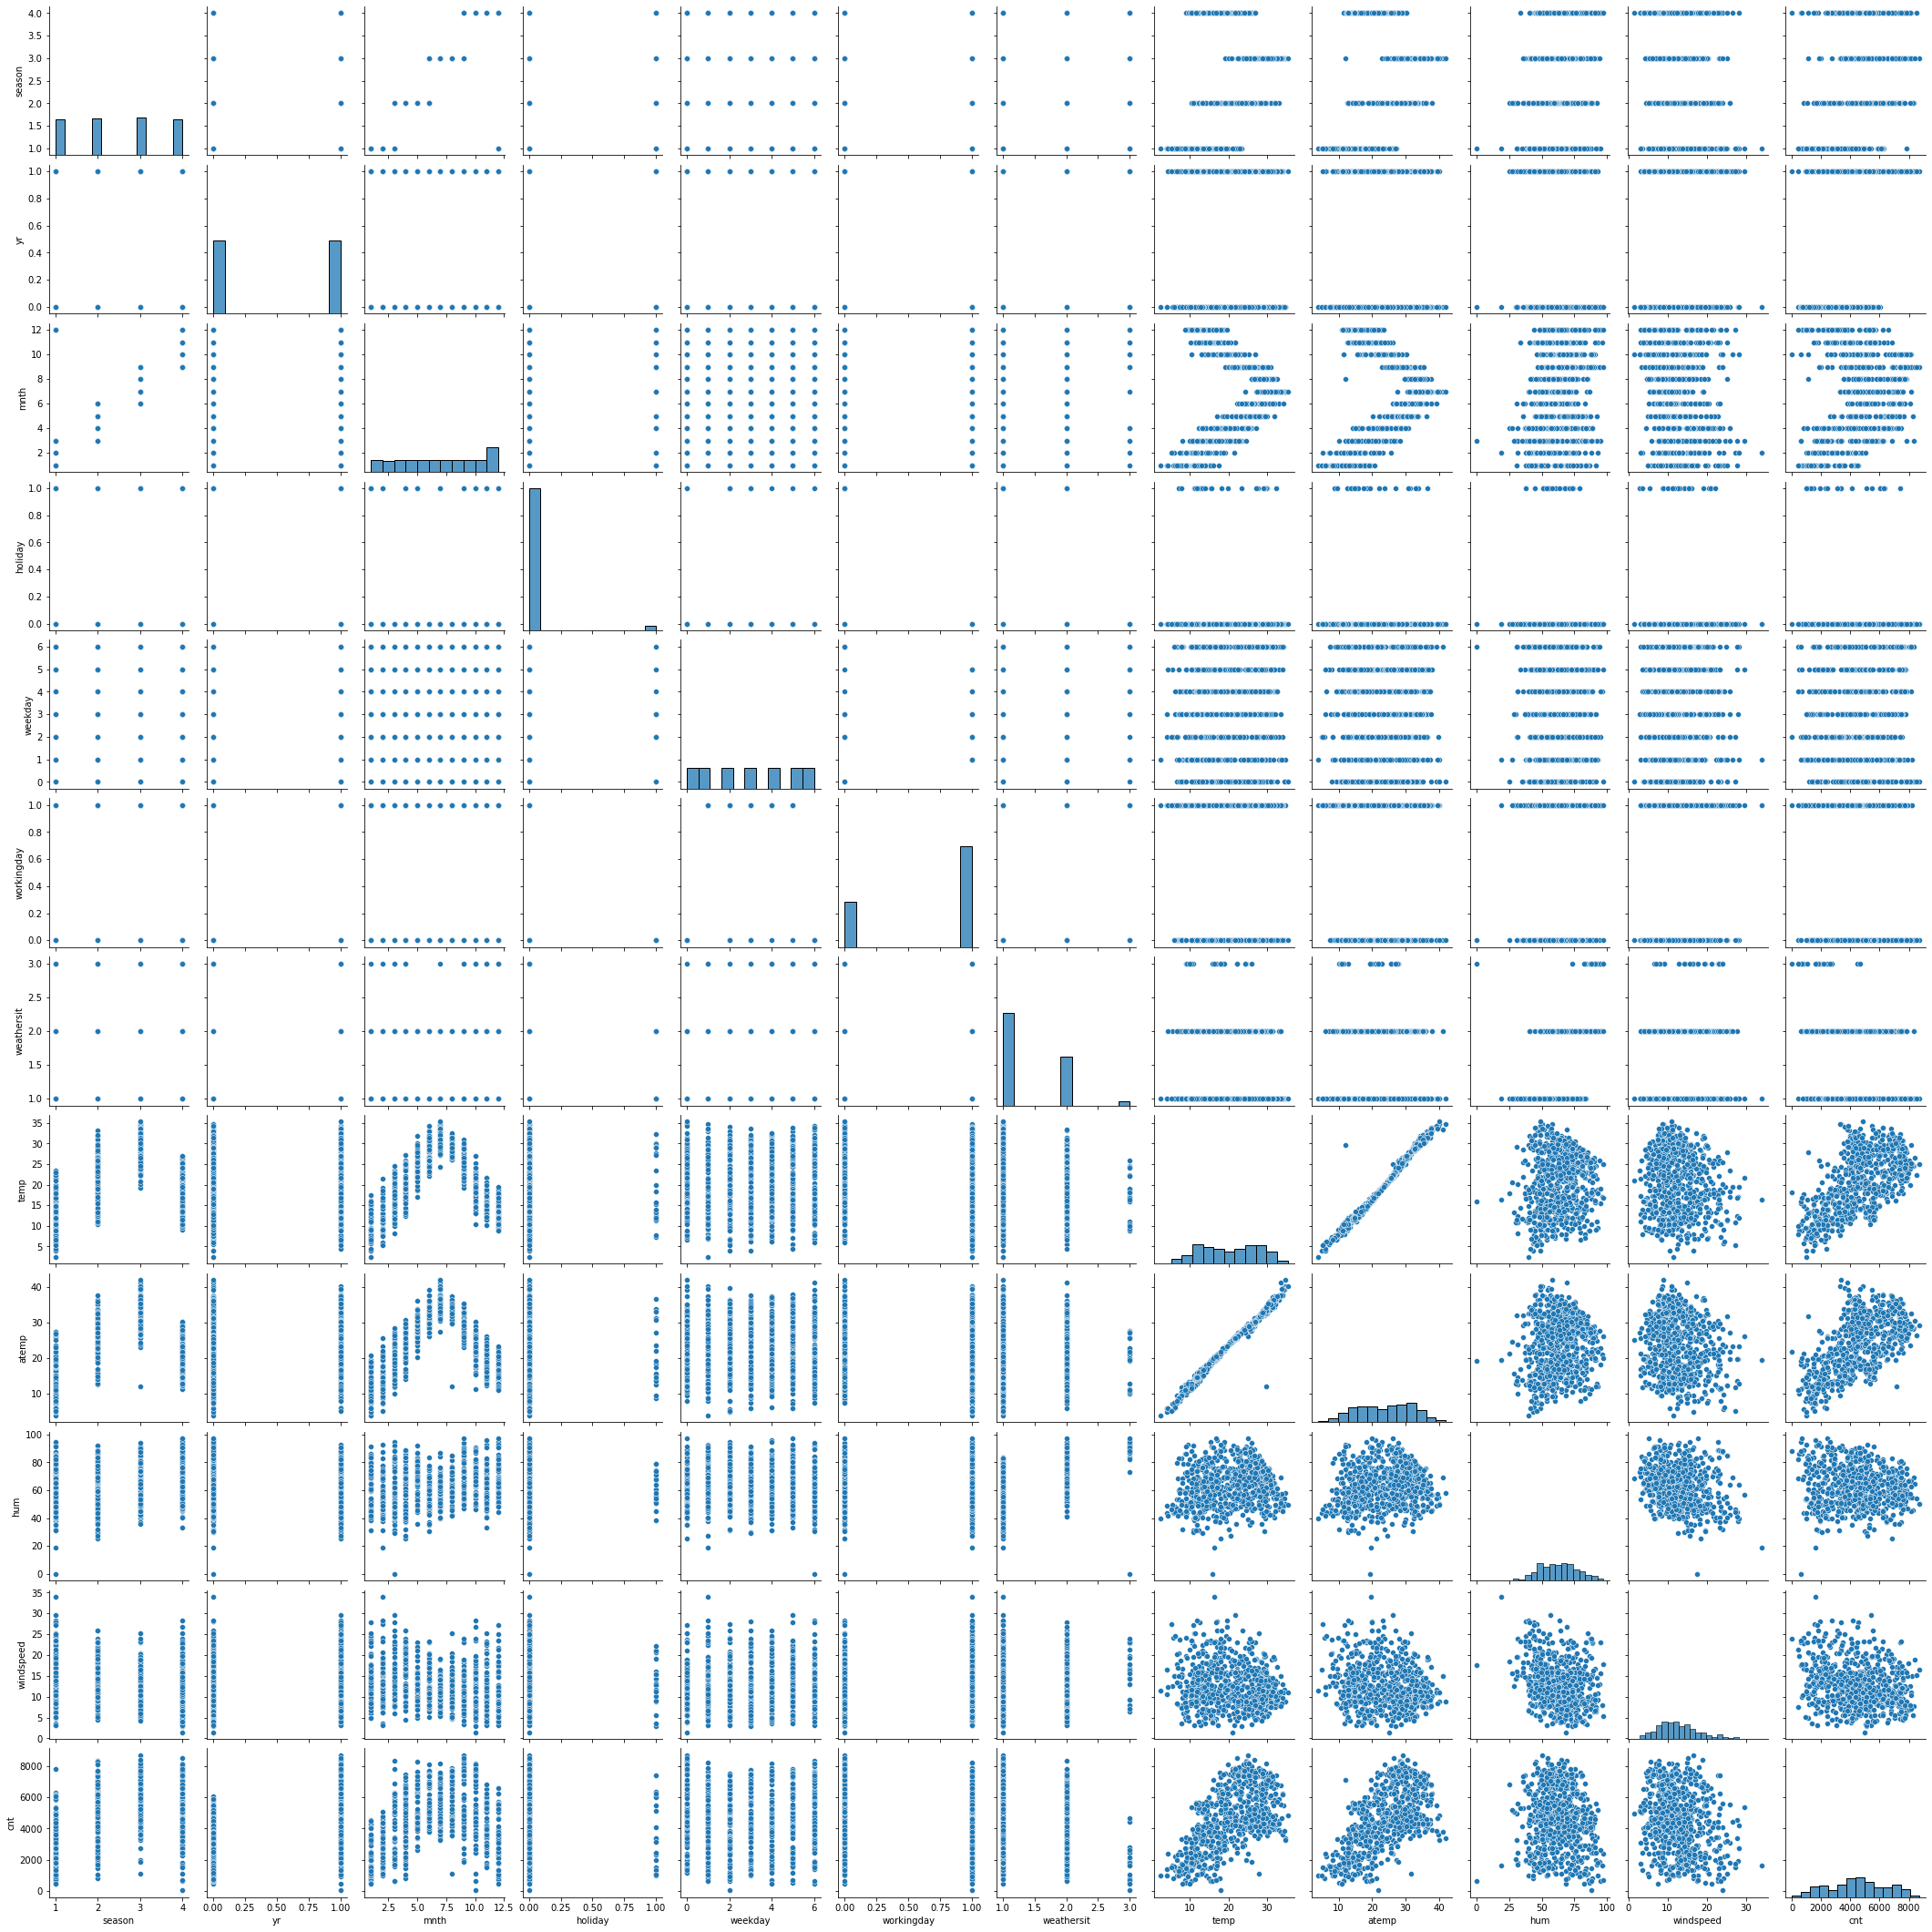

In [14]:
sns.pairplot(Bike_share_df)
plt.show()

---
**Visulization 2**<br>
-  Visualization of Categorical varibales
note (here, 1 = yes and 0 = no)<br>
-  season: (1:spring, 2:summer, 3:fall, 4:winter)
-  weathersit
      - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
	  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
	  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
	  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

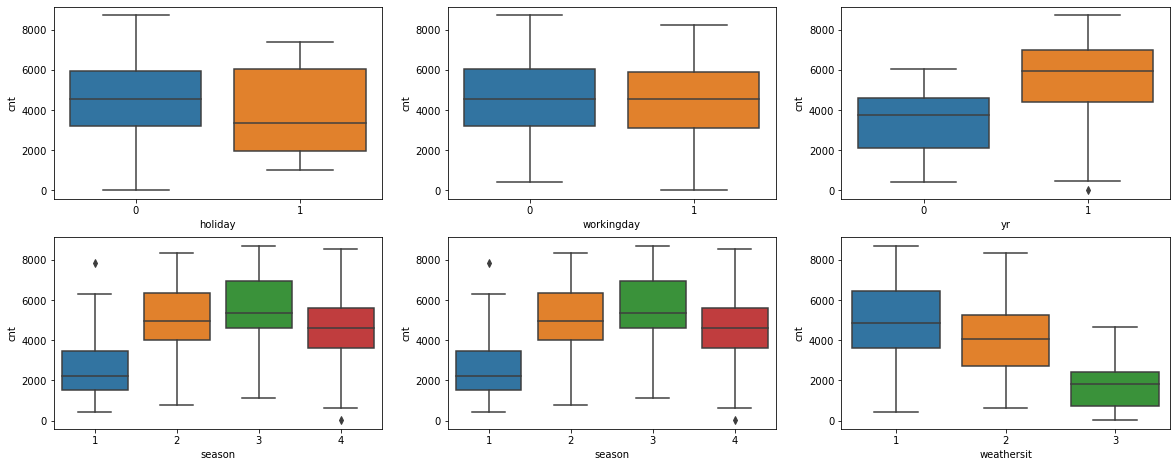

In [15]:
plt.figure(figsize= (20,12))
plt.subplot(3,3,1)
sns.boxplot(data= Bike_share_df, x = 'holiday', y = 'cnt')
plt.subplot(3,3,2)
sns.boxplot(data=Bike_share_df, x= 'workingday', y= 'cnt')
plt.subplot(3,3,3)
sns.boxplot(data=Bike_share_df, x= 'yr', y= 'cnt')
plt.subplot(3,3,4)
sns.boxplot(data=Bike_share_df, x= 'season', y= 'cnt')
plt.subplot(3,3,5)
sns.boxplot(data=Bike_share_df, x= 'season', y= 'cnt')
plt.subplot(3,3,6)
sns.boxplot(data=Bike_share_df, x= 'weathersit', y= 'cnt')
plt.show()

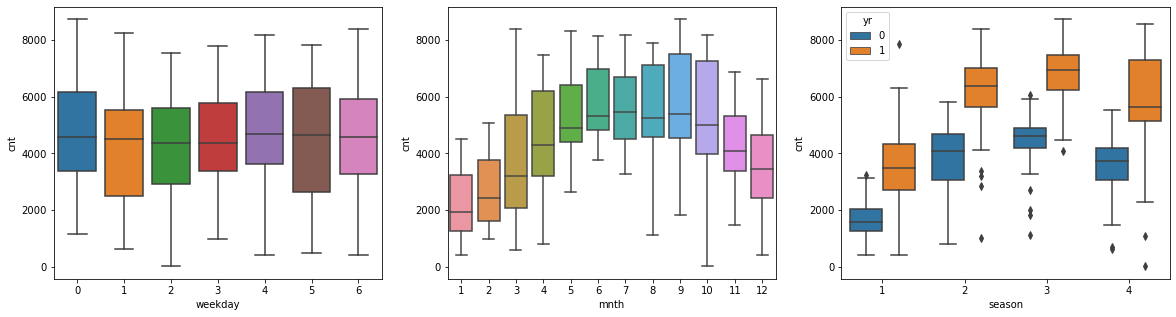

In [16]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.boxplot(data=Bike_share_df, x= 'weekday', y= 'cnt')
plt.subplot(1,3,2)
sns.boxplot(data=Bike_share_df, x= 'mnth', y= 'cnt')
plt.subplot(1,3,3)
sns.boxplot(data= Bike_share_df, x ='season', hue='yr', y= 'cnt')
plt.show()

---
## <font color = green> Observation's
---

-  We used Box plot (refer the fig above) to study their effect on the dependent variable (‘cnt’) .

-  The Obsevartions are :

-  season: Almost 32% of the bike booking were happening in season3 with a median of over 5000 booking (for the period of 2 -  years). This was followed by season2 & season4 with 27% & 25% of total booking. This indicates, season can be a good predictor for the dependent variable.

-  mnth: Almost 10% of the bike booking were happening in the months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

-  weathersit: Almost 67% of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking (for the period of 2 years). This was followed by weathersit2 with 30% of total booking. This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

-  holiday: Almost 97.6% of the bike booking were happening when it is not a holiday which means this data is clearly biased. This indicates, holiday CANNOT be a good predictor for the dependent variable.

-  weekday: weekday variable shows very close trend (between 13.5%-14.8% of total booking on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor. I will let the model decide if this needs to be added or not.

-  workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable
    
-  As we can see  year 2019 In all season's demand is increased.
And as compare to season 1,2 demand in season 2,3 is more in both the year's 2018 and 2019


---
### <font color = brown> Data Preperation
---
 

-  As we follow 2 steps here
   - Converting Binary Categorical variables to 1 and 0 as it is done already, we don not have to do it
   - Converting Others Categorical variables to Dummy varibles

### <font color = green> Creating Dummy
---

In the Dataset `seaon`, `weathersit`,`mnth` and `weekday is in int format we need to change it into category for creating
Dummy

In [17]:
Bike_share_df['season'] = Bike_share_df['season'].astype('category')
Bike_share_df["weathersit"] = Bike_share_df['weathersit'].astype('category')
Bike_share_df['mnth'] = Bike_share_df['mnth'].astype('category')
Bike_share_df['weekday'] = Bike_share_df['weekday'].astype('category')


In [18]:
Bike_share_df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0      1   0    1        0       1           1          2  14.110847   
1      1   0    1        0       2           1          2  14.902598   
2      1   0    1        0       3           1          1   8.050924   
3      1   0    1        0       4           1          1   8.200000   
4      1   0    1        0       5           1          1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [19]:
Bike_share_df = pd.get_dummies(Bike_share_df, drop_first = True)

In [20]:
Bike_share_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [21]:
Bike_share_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           1  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           1  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   season_2  season_3  ...  mnth_11  mnth_12  weekday_1  weekday_2  weekday_3  \
0         0         0  ...        0        0          1          0          0   
1         0         0  ...        0        0          0          1          0   
2         0         0  ...        0        0          0          0          1   
3         0         0  ...        0        0          0          0          0   
4         0         0  ...        0        0          0          0          0   

   weekday_4  weekday_5  weekday_6  weathersit_2  weathersit_3  
0          0          0          0             1             0  
1          0          0          0             1             0  
2          0          0          0             0             0  
3          1          0          0             0             0  
4          0          1          0             0             0  

[5 rows x 30 columns]

Plotting correlation between variables

<AxesSubplot:>

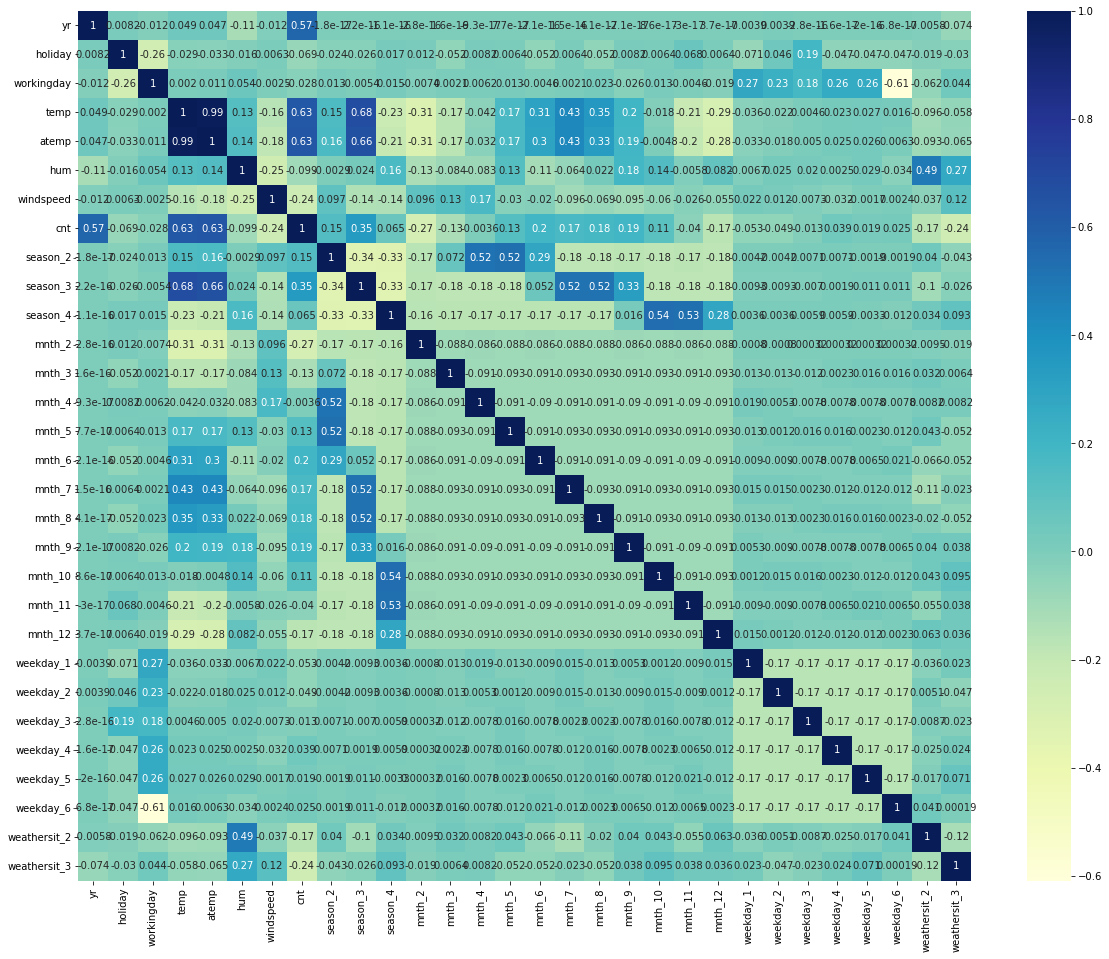

In [111]:
plt.figure(figsize=(20, 16))
sns.heatmap(Bike_share_df.corr(), annot = True,  cmap="YlGnBu")

## <font color = green> Observation
The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

Importing the sklearn library for `Train-Test`

In [23]:
import sklearn
from sklearn.model_selection import train_test_split

## <font color = brown> Splitting Dataset into Train and Test

In [24]:
Train_df, Test_df = train_test_split(Bike_share_df, train_size=0.70, random_state=100)
print(Train_df.shape)
print(Test_df.shape)

(510, 30)
(220, 30)


1. Min-Max scaling b/w(0-1)
2. Standardisation (mean-0, sigma-1) 

We will use `MinMax scaling`<br>
For this we will import Module preprocessing from sklearn

In [25]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

1st.Create Scaler Object

In [26]:
Scaler = MinMaxScaler()

2nd. Create a list of variable(Numerical) we want to scale

In [27]:
Num_vars= ['hum', 'windspeed','cnt','temp','atemp']

3rd. fit on Data


In [28]:
Train_df[Num_vars] = Scaler.fit_transform(Train_df[Num_vars])
Train_df.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
576   1        0           1  0.815169  0.766351  0.725633   0.264686   
426   1        0           0  0.442393  0.438975  0.640189   0.255342   
728   1        0           1  0.245101  0.200348  0.498067   0.663106   
482   1        0           0  0.395666  0.391735  0.504508   0.188475   
111   0        0           0  0.345824  0.318819  0.751824   0.380981   

          cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
576  0.827658         0         1  ...        0        0          0   
426  0.465255         0         0  ...        0        0          0   
728  0.204096         0         0  ...        0        1          1   
482  0.482973         1         0  ...        0        0          0   
111  0.191095         1         0  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
576          0          1          0          0          0             0   
426          0          0          0          0          0             1   
728          0          0          0          0          0             0   
482          0          0          0          0          0             1   
111          0          0          0          0          0             1   

     weathersit_3  
576             0  
426             0  
728             0  
482             0  
111             0  

[5 rows x 30 columns]

Creating X_train and y_train Variables

In [30]:
y_train = Train_df.pop('cnt')
X_train = Train_df

Recursive feature elimination: We will use the LinearRegression function from SciKit Learn for its compatibility with RFE <br>
Importing `linear regression and RFE`


In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, 15)            
rfe = rfe.fit(X_train, y_train)

In [33]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 5),
 ('temp', True, 1),
 ('atemp', False, 4),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', True, 1),
 ('mnth_6', False, 2),
 ('mnth_7', False, 12),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 13),
 ('mnth_12', False, 14),
 ('weekday_1', False, 9),
 ('weekday_2', False, 10),
 ('weekday_3', False, 8),
 ('weekday_4', False, 6),
 ('weekday_5', False, 7),
 ('weekday_6', False, 15),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1)]

In [34]:
Col = X_train.columns[rfe.support_]
Col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_3', 'mnth_5', 'mnth_8', 'mnth_9', 'mnth_10',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

In [35]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'mnth_2', 'mnth_4', 'mnth_6', 'mnth_7',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5', 'weekday_6'],
      dtype='object')

Creating an X train dataframe with variables selected by RFE

In [36]:
X_train_Rf = X_train[Col]

## <font color = green>  Model-1 : Linear Model using STATS
VIF

In [37]:
#checking the VIF values of feature variables
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  24.63
3            hum  15.53
6       season_3   8.80
4      windspeed   3.81
5       season_2   3.75
7       season_4   3.11
13  weathersit_2   2.15
0             yr   2.05
10        mnth_8   1.85
9         mnth_5   1.68
12       mnth_10   1.63
11        mnth_9   1.51
8         mnth_3   1.32
14  weathersit_3   1.19
1        holiday   1.05

Importing statsmodels library

In [38]:
import statsmodels.api as sm

In [39]:
# Add a constant
X_train_lm1 = sm.add_constant(X_train_Rf)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Add a constant
X_train_lm1 = sm.add_constant(X_train_Rf)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [40]:
# parameters
lr1.params

const           0.237384
yr              0.230442
holiday        -0.088900
temp            0.486920
hum            -0.179606
windspeed      -0.183865
season_2        0.116592
season_3        0.042479
season_4        0.152975
mnth_3          0.032292
mnth_5          0.028201
mnth_8          0.050905
mnth_9          0.120667
mnth_10         0.040741
weathersit_2   -0.054170
weathersit_3   -0.242870
dtype: float64

In [41]:
# summary of Linear Regression model 1
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.00e-188
Time:                        01:02:43   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
yr               0.2304      0.008     28.453      0.000       0.215       0.246
holiday         -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = green > Model- 2

In [42]:
#check the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  24.63
3            hum  15.53
6       season_3   8.80
4      windspeed   3.81
5       season_2   3.75
7       season_4   3.11
13  weathersit_2   2.15
0             yr   2.05
10        mnth_8   1.85
9         mnth_5   1.68
12       mnth_10   1.63
11        mnth_9   1.51
8         mnth_3   1.32
14  weathersit_3   1.19
1        holiday   1.05

In [43]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_Rf)

# Creating 2nd fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [44]:
#parameters
lr2.params

const           0.237384
yr              0.230442
holiday        -0.088900
temp            0.486920
hum            -0.179606
windspeed      -0.183865
season_2        0.116592
season_3        0.042479
season_4        0.152975
mnth_3          0.032292
mnth_5          0.028201
mnth_8          0.050905
mnth_9          0.120667
mnth_10         0.040741
weathersit_2   -0.054170
weathersit_3   -0.242870
dtype: float64

In [45]:
# summary of Linear Regression model 2
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.3
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.00e-188
Time:                        01:02:43   Log-Likelihood:                 513.97
No. Observations:                 510   AIC:                            -995.9
Df Residuals:                     494   BIC:                            -928.2
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2374      0.027      8.665      0.000       0.184       0.291
yr               0.2304      0.008     28.453      0.000       0.215       0.246
holiday         -0.0889      0.025     -3.487      0.001      -0.139      -0.039
temp             0.4869      0.034     14.119      0.000       0.419       0.555
hum             -0.1796      0.038     -4.734      0.000      -0.254      -0.105
windspeed       -0.1839      0.026     -7.162      0.000      -0.234      -0.133
season_2         0.1166      0.015      7.527      0.000       0.086       0.147
season_3         0.0425      0.023      1.847      0.065      -0.003       0.088
season_4         0.1530      0.014     10.801      0.000       0.125       0.181
mnth_3           0.0323      0.015      2.196      0.029       0.003       0.061
mnth_5           0.0282      0.018      1.581      0.115      -0.007       0.063
mnth_8           0.0509      0.017      2.913      0.004       0.017       0.085
mnth_9           0.1207      0.017      6.984      0.000       0.087       0.155
mnth_10          0.0407      0.018      2.314      0.021       0.006       0.075
weathersit_2    -0.0542      0.010     -5.187      0.000      -0.075      -0.034
weathersit_3    -0.2429      0.026     -9.185      0.000      -0.295      -0.191
==============================================================================
Omnibus:                       73.210   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.011
Skew:                          -0.739   Prob(JB):                     8.15e-40
Kurtosis:                       5.507   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Droping the column hum as it has high vif value

In [46]:
X_train_Rf = X_train_Rf.drop(["hum"], axis = 1)

## <font color = green > Model- 3
VIF

In [47]:
#check the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2           temp  16.00
5       season_3   8.42
4       season_2   3.70
3      windspeed   3.46
6       season_4   2.94
0             yr   2.04
9         mnth_8   1.85
8         mnth_5   1.67
11       mnth_10   1.61
12  weathersit_2   1.51
10        mnth_9   1.49
7         mnth_3   1.31
13  weathersit_3   1.10
1        holiday   1.04

In [48]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_Rf)

# Create a third fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [49]:
# parameters
lr3.params

const           0.135561
yr              0.234483
holiday        -0.089893
temp            0.453023
windspeed      -0.149808
season_2        0.122907
season_3        0.055352
season_4        0.148451
mnth_3          0.033920
mnth_5          0.017345
mnth_8          0.045024
mnth_9          0.110134
mnth_10         0.037295
weathersit_2   -0.082191
weathersit_3   -0.291901
dtype: float64

In [50]:
# summary of Linear Regression model 3
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          3.97e-185
Time:                        01:02:43   Log-Likelihood:                 502.66
No. Observations:                 510   AIC:                            -975.3
Df Residuals:                     495   BIC:                            -911.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1356      0.017      7.823      0.000       0.102       0.170
yr               0.2345      0.008     28.504      0.000       0.218       0.251
holiday         -0.0899      0.026     -3.452      0.001      -0.141      -0.039
temp             0.4530      0.034     13.147      0.000       0.385       0.521
windspeed       -0.1498      0.025     -5.952      0.000      -0.199      -0.100
season_2         0.1229      0.016      7.797      0.000       0.092       0.154
season_3         0.0554      0.023      2.373      0.018       0.010       0.101
season_4         0.1485      0.014     10.286      0.000       0.120       0.177
mnth_3           0.0339      0.015      2.259      0.024       0.004       0.063
mnth_5           0.0173      0.018      0.960      0.338      -0.018       0.053
mnth_8           0.0450      0.018      2.528      0.012       0.010       0.080
mnth_9           0.1101      0.018      6.293      0.000       0.076       0.145
mnth_10          0.0373      0.018      2.076      0.038       0.002       0.073
weathersit_2    -0.0822      0.009     -9.352      0.000      -0.099      -0.065
weathersit_3    -0.2919      0.025    -11.746      0.000      -0.341      -0.243
==============================================================================
Omnibus:                       72.480   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.779
Skew:                          -0.737   Prob(JB):                     6.76e-39
Kurtosis:                       5.470   Cond. No.                         15.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Droping hum because of high VIf

In [51]:
X_train_Rf = X_train_Rf.drop(["season_3"], axis = 1)

## <font color = green > Model- 4
VIF

In [52]:
# checking the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.22
3      windspeed  3.33
4       season_2  2.31
0             yr  2.02
5       season_4  1.97
8         mnth_8  1.62
7         mnth_5  1.61
10       mnth_10  1.59
11  weathersit_2  1.51
9         mnth_9  1.35
6         mnth_3  1.22
12  weathersit_3  1.10
1        holiday  1.04

In [53]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_Rf)

# Create a fourth fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [54]:
# parameters
lr4.params

const           0.128485
yr              0.232914
holiday        -0.092774
temp            0.514754
windspeed      -0.153571
season_2        0.099847
season_4        0.131025
mnth_3          0.025847
mnth_5          0.009057
mnth_8          0.059660
mnth_9          0.123013
mnth_10         0.030998
weathersit_2   -0.082213
weathersit_3   -0.288157
dtype: float64

In [55]:
# summary of Linear Regression model 4
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.53e-185
Time:                        01:02:43   Log-Likelihood:                 499.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     496   BIC:                            -912.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1285      0.017      7.492      0.000       0.095       0.162
yr               0.2329      0.008     28.274      0.000       0.217       0.249
holiday         -0.0928      0.026     -3.550      0.000      -0.144      -0.041
temp             0.5148      0.023     22.674      0.000       0.470       0.559
windspeed       -0.1536      0.025     -6.085      0.000      -0.203      -0.104
season_2         0.0998      0.012      8.007      0.000       0.075       0.124
season_4         0.1310      0.012     10.496      0.000       0.106       0.156
mnth_3           0.0258      0.015      1.760      0.079      -0.003       0.055
mnth_5           0.0091      0.018      0.508      0.611      -0.026       0.044
mnth_8           0.0597      0.017      3.555      0.000       0.027       0.093
mnth_9           0.1230      0.017      7.359      0.000       0.090       0.156
mnth_10          0.0310      0.018      1.736      0.083      -0.004       0.066
weathersit_2    -0.0822      0.009     -9.311      0.000      -0.100      -0.065
weathersit_3    -0.2882      0.025    -11.565      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.809
Skew:                          -0.665   Prob(JB):                     1.96e-30
Kurtosis:                       5.161   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
X_train_Rf.head()

yr  holiday      temp  windspeed  season_2  season_4  mnth_3  mnth_5  \
576   1        0  0.815169   0.264686         0         0       0       0   
426   1        0  0.442393   0.255342         0         0       1       0   
728   1        0  0.245101   0.663106         0         0       0       0   
482   1        0  0.395666   0.188475         1         0       0       0   
111   0        0  0.345824   0.380981         1         0       0       0   

     mnth_8  mnth_9  mnth_10  weathersit_2  weathersit_3  
576       0       0        0             0             0  
426       0       0        0             1             0  
728       0       0        0             0             0  
482       0       0        0             1             0  
111       0       0        0             1             0

## <font color = green> Model- 5
VIF

In [57]:
# check the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.22
3      windspeed  3.33
4       season_2  2.31
0             yr  2.02
5       season_4  1.97
8         mnth_8  1.62
7         mnth_5  1.61
10       mnth_10  1.59
11  weathersit_2  1.51
9         mnth_9  1.35
6         mnth_3  1.22
12  weathersit_3  1.10
1        holiday  1.04

In [58]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_Rf)

# Create a fifth fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

In [59]:
#checking parameters
lr5.params

const           0.128485
yr              0.232914
holiday        -0.092774
temp            0.514754
windspeed      -0.153571
season_2        0.099847
season_4        0.131025
mnth_3          0.025847
mnth_5          0.009057
mnth_8          0.059660
mnth_9          0.123013
mnth_10         0.030998
weathersit_2   -0.082213
weathersit_3   -0.288157
dtype: float64

In [60]:
#  summary of Linear Regression model 5
lr5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          4.53e-185
Time:                        01:02:43   Log-Likelihood:                 499.77
No. Observations:                 510   AIC:                            -971.5
Df Residuals:                     496   BIC:                            -912.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1285      0.017      7.492      0.000       0.095       0.162
yr               0.2329      0.008     28.274      0.000       0.217       0.249
holiday         -0.0928      0.026     -3.550      0.000      -0.144      -0.041
temp             0.5148      0.023     22.674      0.000       0.470       0.559
windspeed       -0.1536      0.025     -6.085      0.000      -0.203      -0.104
season_2         0.0998      0.012      8.007      0.000       0.075       0.124
season_4         0.1310      0.012     10.496      0.000       0.106       0.156
mnth_3           0.0258      0.015      1.760      0.079      -0.003       0.055
mnth_5           0.0091      0.018      0.508      0.611      -0.026       0.044
mnth_8           0.0597      0.017      3.555      0.000       0.027       0.093
mnth_9           0.1230      0.017      7.359      0.000       0.090       0.156
mnth_10          0.0310      0.018      1.736      0.083      -0.004       0.066
weathersit_2    -0.0822      0.009     -9.311      0.000      -0.100      -0.065
weathersit_3    -0.2882      0.025    -11.565      0.000      -0.337      -0.239
==============================================================================
Omnibus:                       61.945   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.809
Skew:                          -0.665   Prob(JB):                     1.96e-30
Kurtosis:                       5.161   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Droping month_10 and month_5 because of high P-Value

In [62]:
X_train_Rf = X_train_Rf.drop(['mnth_10','mnth_5'], axis = 1) 

## <font color = green> Model- 6
VIF

In [63]:
#check the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2           temp  5.01
3      windspeed  3.29
0             yr  2.01
4       season_2  1.82
7         mnth_8  1.59
5       season_4  1.52
9   weathersit_2  1.49
8         mnth_9  1.31
6         mnth_3  1.19
10  weathersit_3  1.08
1        holiday  1.04

In [64]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_Rf)

# Create a sixth fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

In [65]:
# parameters
lr6.params

const           0.124632
yr              0.232357
holiday        -0.093980
temp            0.523330
windspeed      -0.152643
season_2        0.101340
season_4        0.141305
mnth_3          0.024933
mnth_8          0.056265
mnth_9          0.118035
weathersit_2   -0.081053
weathersit_3   -0.283265
dtype: float64

In [66]:
# summary of Linear Regression model 6
lr6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     228.8
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          9.87e-187
Time:                        01:04:36   Log-Likelihood:                 498.11
No. Observations:                 510   AIC:                            -972.2
Df Residuals:                     498   BIC:                            -921.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1246      0.017      7.322      0.000       0.091       0.158
yr               0.2324      0.008     28.218      0.000       0.216       0.249
holiday         -0.0940      0.026     -3.593      0.000      -0.145      -0.043
temp             0.5233      0.022     23.568      0.000       0.480       0.567
windspeed       -0.1526      0.025     -6.065      0.000      -0.202      -0.103
season_2         0.1013      0.011      9.145      0.000       0.080       0.123
season_4         0.1413      0.011     12.925      0.000       0.120       0.163
mnth_3           0.0249      0.015      1.716      0.087      -0.004       0.053
mnth_8           0.0563      0.017      3.374      0.001       0.024       0.089
mnth_9           0.1180      0.017      7.152      0.000       0.086       0.150
weathersit_2    -0.0811      0.009     -9.208      0.000      -0.098      -0.064
weathersit_3    -0.2833      0.025    -11.434      0.000      -0.332      -0.235
==============================================================================
Omnibus:                       54.964   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.001
Skew:                          -0.619   Prob(JB):                     2.90e-25
Kurtosis:                       4.945   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Droping the month_3 because of high P-Value

In [68]:
X_train_Rf = X_train_Rf.drop(['mnth_3'], axis = 1) 

## <font color = green> Model-7 
VIF

In [71]:
#checking the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  5.01
3     windspeed  3.10
0            yr  2.00
4      season_2  1.82
6        mnth_8  1.58
8  weathersit_2  1.49
5      season_4  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
1       holiday  1.04

In [73]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_Rf)

# Create a sixth fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

In [74]:
# parameters
lr7.params

const           0.130722
yr              0.232563
holiday        -0.096575
temp            0.517336
windspeed      -0.149709
season_2        0.101217
season_4        0.137090
mnth_8          0.054141
mnth_9          0.116291
weathersit_2   -0.081139
weathersit_3   -0.281852
dtype: float64

In [75]:
# summary of Linear Regression model 7
lr7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.62e-187
Time:                        01:09:57   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
yr               0.2326      0.008     28.191      0.000       0.216       0.249
holiday         -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = green> Model-8
VIF

In [77]:
#check the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  5.01
3     windspeed  3.10
0            yr  2.00
4      season_2  1.82
6        mnth_8  1.58
8  weathersit_2  1.49
5      season_4  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
1       holiday  1.04

In [79]:
# Add a constant
X_train_lm8 = sm.add_constant(X_train_Rf)

# Create a sixth fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

In [80]:
# parameters
lr8.params

const           0.130722
yr              0.232563
holiday        -0.096575
temp            0.517336
windspeed      -0.149709
season_2        0.101217
season_4        0.137090
mnth_8          0.054141
mnth_9          0.116291
weathersit_2   -0.081139
weathersit_3   -0.281852
dtype: float64

In [81]:
# summary of Linear Regression model 8
lr8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     250.5
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          2.62e-187
Time:                        01:12:48   Log-Likelihood:                 496.61
No. Observations:                 510   AIC:                            -971.2
Df Residuals:                     499   BIC:                            -924.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1307      0.017      7.837      0.000       0.098       0.163
yr               0.2326      0.008     28.191      0.000       0.216       0.249
holiday         -0.0966      0.026     -3.692      0.000      -0.148      -0.045
temp             0.5173      0.022     23.546      0.000       0.474       0.561
windspeed       -0.1497      0.025     -5.950      0.000      -0.199      -0.100
season_2         0.1012      0.011      9.116      0.000       0.079       0.123
season_4         0.1371      0.011     12.843      0.000       0.116       0.158
mnth_8           0.0541      0.017      3.249      0.001       0.021       0.087
mnth_9           0.1163      0.017      7.046      0.000       0.084       0.149
weathersit_2    -0.0811      0.009     -9.200      0.000      -0.098      -0.064
weathersit_3    -0.2819      0.025    -11.361      0.000      -0.331      -0.233
==============================================================================
Omnibus:                       55.243   Durbin-Watson:                   2.060
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              119.255
Skew:                          -0.606   Prob(JB):                     1.27e-26
Kurtosis:                       5.036   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## <font color = brown> Observations
   ---

This model appears seems good because it appears to have low multicollinearity across the predictors and all of the p-values appear to be significant. For the time being, this will be our final model (unless until the Test data metrics are not significantly close to this number).

#### Interpretation

The lr8 model's summary shows that none of our coefficients are equal to zero, implying that we reject the NULL HYPOTHESIS.


### F-Statistics
---
F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
F-statistic: 250.5
Prob (F-statistic): 2.62e-187
The F-Statistics value of 250.5 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

### The best fitting surface equation based on model lr8
---
cnt=0.0.1307+(yr*0.2326)+(temp*0.5173)-(windspeed*0.1497)+(season_2*0.1012)+(season_4*0.1371)+(mnth_9*0.1163)-(weathersit_2*0.0811)-(weathersit_3*0.2819)

### Interpretation 
---

yr: A coefficient value of ‘0.2326’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2326 units.

temp: A coefficient value of ‘0.5173’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5173 units.

windspeed: A coefficient value of ‘0.1497’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1497 units.

season_2: A coefficient value of ‘0.1012’ indicated that w.r.t season_1, a unit increase in season_2 variable decreases the bike hire numbers by 0.1012 units.

season_4: A coefficient value of ‘0.1371’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1371 units.

mnth_9: A coefficient value of ‘0.1163’ indicated that w.r.t mnth_1, a unit increase in mnth_9 variable increases the bike hire numbers by 0.1163 units.


weathersit_2: A coefficient value of ‘0.0811’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.0811 units.

weathersit_3: A coefficient value of ‘0.2819’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.2819 units.

---
## <font color = brwon> Assumption's
---

### Residual Analysis on Training Dataset
---

In [85]:
y_train_pred = lr8.predict(X_train_lm8)

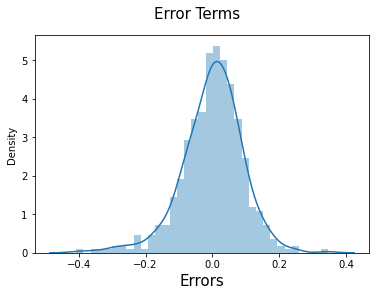

In [87]:
res = y_train-y_train_pred
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 35)
fig.suptitle('Error Terms', fontsize = 15)                  
plt.xlabel('Errors', fontsize = 15)
plt.show()

#### Observations:

We can see that the Residuals are normally distributed in the distplot above. As a result, our Linear Regression assumption is correct.

## There is'nt Multicollinearity between the predictor variables
---

In [88]:
#check the VIF values of feature variables
vif = pd.DataFrame()
vif['Features'] = X_train_Rf.columns
vif['VIF'] = [variance_inflation_factor(X_train_Rf.values, i) for i in range(X_train_Rf.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2          temp  5.01
3     windspeed  3.10
0            yr  2.00
4      season_2  1.82
6        mnth_8  1.58
8  weathersit_2  1.49
5      season_4  1.48
7        mnth_9  1.31
9  weathersit_3  1.08
1       holiday  1.04

According to the VIF calculation, there is multicollinearity bw temp and rest of vars does not show multicollinearity between the predictor variables because all of the values are within the acceptable range of less than 5.

## <font color = green> Final Model
---

In [94]:
### Applying  scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
Test_df[num_vars] = Scaler.transform(Test_df[num_vars])

In [96]:
Test_df.head(7)

yr  holiday  workingday      temp     atemp       hum  windspeed  \
184   0        1           0  0.307016  0.976603  0.004808   0.092231   
535   1        0           1  0.330605  1.065737  0.004281   0.158068   
299   0        0           0  0.198574  0.642307  0.006821   0.329011   
221   0        0           1  0.323916  1.007994  0.002349   0.334091   
152   0        0           0  0.302087  0.942150  0.000978   0.521483   
404   1        0           0  0.111962  0.329370  0.003936   0.321424   
198   0        0           1  0.315466  1.038383  0.004961   0.365746   

            cnt  season_2  season_3  ...  mnth_11  mnth_12  weekday_1  \
184  158.541277         0         1  ...        0        0          0   
535  162.951731         1         0  ...        0        0          0   
299   69.702140         0         0  ...        0        0          0   
221  125.384117         0         1  ...        0        0          0   
152  130.319625         1         0  ...        0        0          0   
404  100.444052         0         0  ...        0        0          0   
198  116.930747         0         1  ...        0        0          0   

     weekday_2  weekday_3  weekday_4  weekday_5  weekday_6  weathersit_2  \
184          0          1          0          0          0             1   
535          0          0          1          0          0             0   
299          0          0          0          0          1             1   
221          0          0          0          1          0             0   
152          0          0          0          0          1             0   
404          0          0          0          0          1             0   
198          0          1          0          0          0             0   

     weathersit_3  
184             0  
535             0  
299             0  
221             0  
152             0  
404             0  
198             0  

[7 rows x 30 columns]

In [97]:
Test_df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.214427    0.687165    0.004594   
std      0.500809    0.187620    0.480828    0.079067    0.265712    0.001660   
min      0.000000    0.000000    0.000000    0.040780    0.067625    0.000393   
25%      0.000000    0.000000    0.000000    0.145498    0.457415    0.003377   
50%      0.000000    0.000000    1.000000    0.214242    0.701594    0.004453   
75%      1.000000    0.000000    1.000000    0.281314    0.907728    0.005773   
max      1.000000    1.000000    1.000000    0.358772    1.234827    0.008657   

        windspeed         cnt    season_2    season_3  ...     mnth_11  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.309203  119.623201    0.263636    0.245455  ...    0.072727   
std      0.151153   50.010568    0.441609    0.431338  ...    0.260281   
min     -0.028085   11.473651    0.000000    0.000000  ...    0.000000   
25%      0.200800   86.864843    0.000000    0.000000  ...    0.000000   
50%      0.296732  120.199209    0.000000    0.000000  ...    0.000000   
75%      0.393904  155.128426    1.000000    0.000000  ...    0.000000   
max      0.777276  220.287628    1.000000    1.000000  ...    1.000000   

          mnth_12   weekday_1   weekday_2   weekday_3   weekday_4   weekday_5  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.086364    0.118182    0.122727    0.159091    0.140909    0.131818   
std      0.281541    0.323559    0.328872    0.366595    0.348721    0.339064   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        weekday_6  weathersit_2  weathersit_3  
count  220.000000    220.000000    220.000000  
mean     0.172727      0.318182      0.027273  
std      0.378873      0.466833      0.163248  
min      0.000000      0.000000      0.000000  
25%      0.000000      0.000000      0.000000  
50%      0.000000      0.000000      0.000000  
75%      0.000000      1.000000      0.000000  
max      1.000000      1.000000      1.000000  

[8 rows x 30 columns]

In [98]:
y_test = Test_df.pop('cnt')
X_test = Test_df
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            220 non-null    int64  
 1   holiday       220 non-null    int64  
 2   workingday    220 non-null    int64  
 3   temp          220 non-null    float64
 4   atemp         220 non-null    float64
 5   hum           220 non-null    float64
 6   windspeed     220 non-null    float64
 7   season_2      220 non-null    uint8  
 8   season_3      220 non-null    uint8  
 9   season_4      220 non-null    uint8  
 10  mnth_2        220 non-null    uint8  
 11  mnth_3        220 non-null    uint8  
 12  mnth_4        220 non-null    uint8  
 13  mnth_5        220 non-null    uint8  
 14  mnth_6        220 non-null    uint8  
 15  mnth_7        220 non-null    uint8  
 16  mnth_8        220 non-null    uint8  
 17  mnth_9        220 non-null    uint8  
 18  mnth_10       220 non-null  

In [99]:
#Selecting the variables that were part of final model.
cols1=X_train_Rf.columns
X_test=X_test[cols1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         220 non-null    float64
 1   yr            220 non-null    int64  
 2   holiday       220 non-null    int64  
 3   temp          220 non-null    float64
 4   windspeed     220 non-null    float64
 5   season_2      220 non-null    uint8  
 6   season_4      220 non-null    uint8  
 7   mnth_8        220 non-null    uint8  
 8   mnth_9        220 non-null    uint8  
 9   weathersit_2  220 non-null    uint8  
 10  weathersit_3  220 non-null    uint8  
dtypes: float64(3), int64(2), uint8(6)
memory usage: 11.6 KB


In [100]:
# Using the final model (lr8) to make predictions on test dataset
y_pred = lr8.predict(X_test_lm8)

## Evaluation of Model
---

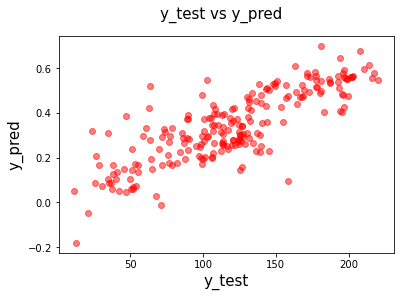

In [101]:
# Understanding the spread by plotting y_test and y_pred 

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5,color="red")
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 15)                          
plt.ylabel('y_pred', fontsize = 15) 
plt.show()

#### R^2 for Test Data

In [102]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-5.709469650778775

#### R-Adjusted

In [105]:
# Get the shape of X_test
X_test.shape

(220, 10)

In [106]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula
r2=0.8067023927509687
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7974537034089098

### Final Result 
---
Train R^2 :0.0.834 <br>
Train Adjusted R^2 :0.831<br>
Test R^2 :-5.7094 <br>
Test Adjusted R^2 :0.799<br>

This appears to be a pretty good model that can 'Generalize' various datasets.

### Final Conclusion
---

**The top three predictor variables that influence bike booking, according to our final Model, are:**
    
yr: A coefficient value of ‘0.2326’ indicated that a unit increase in yr variable, increases the bike hire numbers by 0.2326 units.

temp: A coefficient value of ‘0.5173’ indicated that a unit increase in temp variable, increases the bike hire numbers by 0.5173 units.

windspeed: A coefficient value of ‘0.1497’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1497 units.

season_4: A coefficient value of ‘0.1371’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.1371 units.

weathersit_3: A coefficient value of ‘0.2819’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit2 variable, decreases the bike hire numbers by 0.2819 units.

### Note:
---

The details of weathersit_2 & weathersit_3 are:-<br>

weathersit_2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>

weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>